# Setup

In [26]:
import json
import os

import numpy as np
import palettable

In [27]:
scene_dir = "../test_data"
scene_dir_from_exec_dir = "../../tests/test_data"
scenes = [
    "initial_conditions",
]

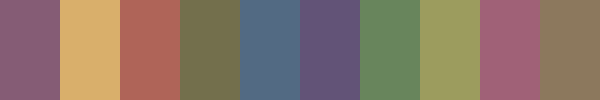

In [28]:
color_scheme = palettable.cartocolors.qualitative.Antique_10
colors = (np.array(color_scheme.mpl_colors) * 255).astype(int)
colors = np.hstack([colors, np.full((colors.shape[0], 1), 255)])
color_scheme.show_discrete_image()

# Simple Scene

In [29]:
scene_key = "test_scene"

In [30]:
scene_data = {}

In [ ]:
scene_data["player"] = {
    "components": {
        "PhysicsComp": {
            "mass": 1.0,
            "pos": [1.0, 1.0],
            "vel": [2.0, 2.0],
            "collided": True,
        },
        "DragForceComp": {"drag_coefficient": 0.05, "drag_power": 2.5},
        "DurabilityComp": {"delete_at_zero": False},
        "RenderComp": {"radius": 1.0, "fill_color": [255, 128, 128, 255]},
        "SceneTriggerComp": {"scene_name": "[SceneComp|name:triggered_scene]"},
        "StopWatchComp": {},
        "ViewComp": {},
        "UnresolvedNameComp": {},
    }
}

In [32]:
scene_data["beacon"] = {
    "components": {
        "PhysicsComp": {},
        "MouseButtonReleasedComp": {},
        "RenderComp": {
            "radius": 0.5,
            "outline_thickness": 0.1,
            "fill_color": [0, 0, 0, 255],
            "outline_color": [255, 255, 255, 255],
            "zorder": 1,
        },
    }
}

In [ ]:
scene_data["player-beacon force"] = {
    "components": {
        "PairComp": {"target_entity_name": "player", "source_entity_name": "beacon"},
        "PairwiseForceComp": {"magnitude": -1.0},
        "UnresolvedNamesComp": {},
    }
}

In [34]:
scene_data[f"bkgrd"] = {
    "components": {
        "PhysicsComp": {},
        "RenderComp": {
            "radius": 10.0,
            "outline_thickness": 0.2,
            "fill_color": [127, 127, 127, 255],
            "outline_color": [63, 63, 63, 255],
            "zorder": - 101,
        },
    }
}

In [35]:
scene_data["triggered_scene"] = {
    "components": {
        "SceneComp": {
            "scene_fp": os.path.join(scene_dir_from_exec_dir, "triggered_scene.json"),
        },
    },
}

In [36]:
with open(f"{scene_dir}/{scene_key}.json", "w") as json_file:
    json.dump(scene_data, json_file, indent=4)